In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from skfeature.function.similarity_based import fisher_score
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [2]:
df=pd.read_csv("vg2.csv" , sep = "," , encoding = "utf-8")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.067754,0.858195,-2.836722,-0.246717,359,15.813249,6.606207,11.863941,-0.050111,20
1,1.065648,-1.286693,-3.009695,-0.246717,359,13.154171,4.366490,15.851098,-0.050111,18
2,1.064143,-0.571730,-3.182668,-0.246717,359,11.824632,6.606207,11.863941,-0.050111,17
3,-1.373404,1.453998,0.795709,0.816575,21,11.824632,8.845924,-0.097529,6.767480,14
4,-1.375210,1.453998,0.622736,0.816575,21,11.824632,6.606207,-0.097529,6.767480,14


In [4]:
X= df.iloc[:, :-1] 
  
y= df.iloc[:, -1]

# information gain

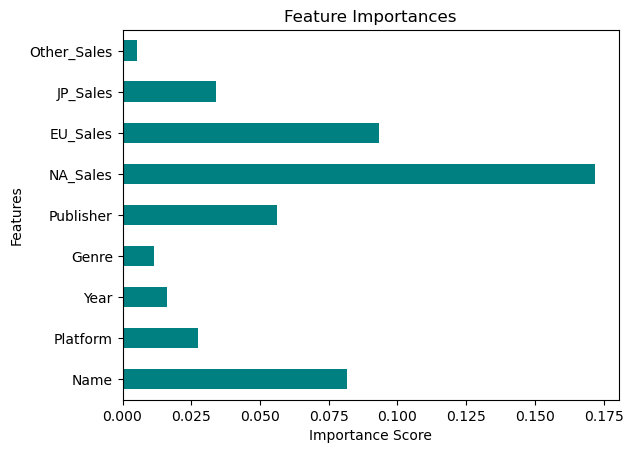

In [5]:
importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, index=X.columns)

feat_importances.plot(kind='barh', color='teal')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# fisher score

In [6]:
#ranks = fisher_score.fisher_score(X.values, y.values)

#feat_importances = pd.Series(ranks, index=X.columns)

#feat_importances.plot(kind='barh', color='teal')
#plt.title('Feature Importances using Fisher Score')
#plt.xlabel('Importance Score')
#plt.ylabel('Features')
#plt.show()

# Chi-square

In [7]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X_cat = X.astype(int)
#X_cat=(X-X.min()).astype(int)
#chi2_features = SelectKBest(chi2, k=3)
#X_kbest_features = chi2_features.fit_transform(X_cat, y)
#print('Original feature number:', X_cat.shape[1])
#print('Reduced feature number:', X_kbest_features.shape[1])
#print('Selected features:', X_kbest_features[:5]) 

# vif test

In [27]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         Feature        VIF
0          const   4.691150
1           Name   1.001714
2       Platform   1.037126
3           Year   1.071136
4          Genre   1.021293
5      Publisher   1.005609
6       NA_Sales   5.095846
7       EU_Sales   3.070707
8       JP_Sales   1.608924
9    Other_Sales   1.215533
10  Global_Sales  10.075572


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
predictions = lm.predict(X_test)

In [13]:
lm.score(X_test, y_test)

0.889793346794808

In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.006421
Platform,0.010314
Year,-0.009306
Genre,-0.005537
Publisher,0.000049
NA_Sales,0.870551
EU_Sales,0.593135
JP_Sales,0.274612
Other_Sales,0.118327


In [15]:
print(lm.intercept_)

0.28430025604406906


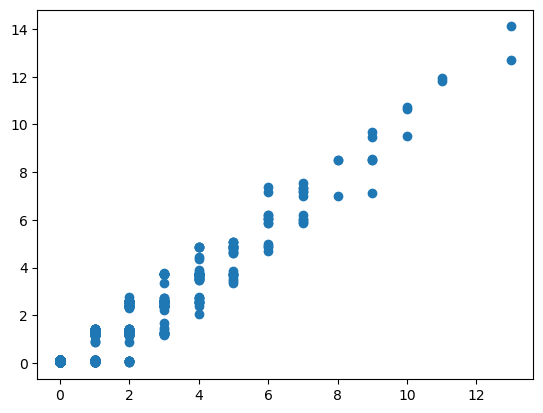

In [16]:
plt.scatter(y_test,predictions)

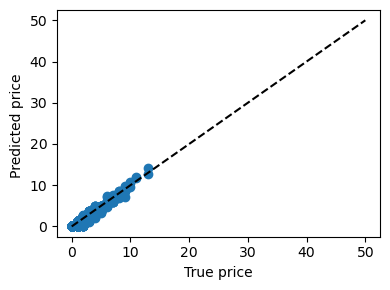

In [17]:
plt.figure(figsize=(4, 3))

plt.scatter(y_test,predictions)

plt.plot([0, 50], [0, 50], '--k')

plt.axis('tight')

plt.xlabel('True price')

plt.ylabel('Predicted price ')

plt.tight_layout()

In [18]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.15517587735169192
MSE: 0.08644557084936598
RMSE: 0.294016276504152


# Ridge Regression

In [23]:
ridge_model = Ridge(alpha=1) 
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [24]:
ridge_model.score(X_test, y_test)

0.8897848787885771

In [25]:
ridge_model.score(X_train,y_train)

0.9064728508884812

In [26]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error (MSE):", mse_ridge)
print("Ridge Regression R2 Score:", r2_ridge)

Ridge Regression Mean Squared Error (MSE): 0.08645221311288909
Ridge Regression R2 Score: 0.8897848787885771
